<a href="https://colab.research.google.com/github/UdayLab/PAMI/blob/main/notebooks/subgraphMining/basic/gspan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finding frequent subgraphs in graph databases using gSpan

This tutorial has two parts.
1.   Basic approach to find frequent subgraphs at a single minimum support value
2.   Advanced approach to find frequent subgraphs at different minimum support values

# Prerequisites:


### Step 1: Download the latest version of PAMI repository

In [1]:
!pip install -U pami

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.1/897.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.1 MB/s eta 0:00:00
  Created wheel for JsonForm: filename=JsonForm-0.0.2-py3-none-any.whl size=3311 sha256=37e31f0aeb7f4591dbf91e3ff245e956789cbe7594864cac511604020ede55b1
  Stored in directory: /root/.cache/pip/wheels/b6/e5/87/11026246d3bd4ad67c0615682d2d6748bbd9a40ac0490882bd
  Created wheel for JsonSir: filename=JsonSir-0.0.2-py3-none-any.whl size=4753 sha256=3d0e17d626bf13ff2c8f670b4f9ca3240063dc1598374f7f0b2ae4aa9073f73b
  Stored in directory: /root/.cache/pip/wheels/1d/4c/d3/4d9757425983b43eb709be1043d82cd03fb863ce5f56f117e6
Successfully built JsonForm JsonSir


### Step 2: Download the sample graph database from the SPMF library

In [2]:
!wget https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt

--2024-03-13 16:09:14--  https://www.philippe-fournier-viger.com/spmf/datasets/Chemical_340.txt
Resolving www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)... 104.21.33.228, 172.67.193.154, 2606:4700:3030::6815:21e4, ...
Connecting to www.philippe-fournier-viger.com (www.philippe-fournier-viger.com)|104.21.33.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169680 (166K) [text/plain]
Saving to: ‘Chemical_340.txt’

Chemical_340.txt    100%[===================>] 165.70K  1002KB/s    in 0.2s    

2024-03-13 16:09:15 (1002 KB/s) - ‘Chemical_340.txt’ saved [169680/169680]



### Step 3: Printing a few lines of the graph database

In [3]:
!head -30 Chemical_340.txt

t # 0
v 0 0
v 1 0
v 2 0
v 3 0
v 4 0
v 5 0
v 6 1
v 7 1
v 8 1
v 9 1
v 10 2
v 11 0
v 12 0
v 13 2
v 14 0
v 15 0
v 16 0
v 17 0
v 18 1
v 19 1
v 20 1
v 21 3
v 22 3
v 23 4
v 24 5
v 25 5
e 0 1 3
e 1 2 3
e 2 3 3


***

# Basic approach: Discovering frequent subgraphs using a single minimum support

### Step 1: Understanding the statistics of the graph database

In [6]:
from PAMI.extras.stats import graphDatabase as alg

obj = alg.graphDatabase(iFile='Chemical_340.txt')

obj.printGraphDatabaseStatistics()

#obj.printIndividualGraphStats()     #prints additional information pertaining to each graph that exists in the data

average_nodes: 27.026470588235295
average_edges: 27.402941176470588
max_nodes: 214
min_nodes: 2
max_edges: 214
min_edges: 1
total_unique_vertex_labels: 66
total_unique_edge_labels: 4


### Step 2: Drawing the frequency graphs

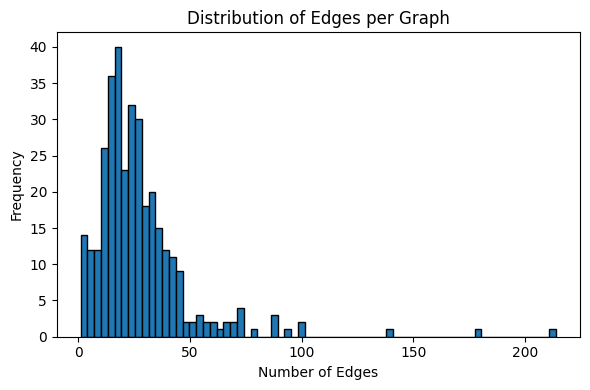

In [7]:
obj.plotEdgeDistribution()

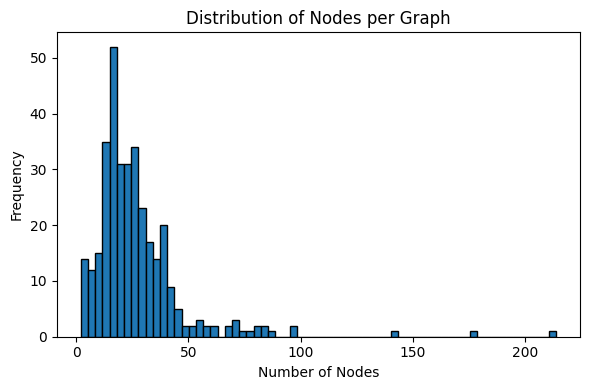

In [9]:
obj.plotNodeDistribution()

In [ ]:
# Visualize the graphs in the data


from PAMI.extras.visualize import graphs as vis

objVis = vis.graphDatabase(iFile='Chemical_340.txt')

objVis.plot()

### Step 3: Choosing an appropriate minimum support

In [10]:
minSup = 0.2

### Step 4: Frequent subgraph discovery using gspan

In [11]:
from PAMI.subgraphMining.basic import gspan as alg

obj = alg.GSpan('Chemical_340.txt', 0.2, True, 100, True)

obj.mine()

frequentGraphs = obj.getFrequentSubgraphs()


memUSS = obj.getMemoryUSS()
print("Total Memory in USS:", memUSS)

memRSS = obj.getMemoryRSS()
print("Total Memory in RSS", memRSS)

run = obj.getRuntime()
print("Total ExecutionTime in seconds:", run)


obj.save('frequentSupgraphs.txt')

Total Memory in USS: 148164608
Total Memory in RSS 170000384
Total ExecutionTime in seconds: 124.10313653945923


In [ ]:
# Visualize the frequent subgraphs found in the data


from PAMI.extras.visualize import graphs as vis

objVis = vis.graphDatabase(iFile='frequentSupgraphs.txt')

objVis.plot()

### Step 5: Investigate the generated subgraphs

In [13]:
!head -10 frequentSupgraphs.txt

t # 0 * 214
v 0 0
x 0 1 2 10 11 12 13 14 16 17 19 21 23 24 26 28 29 31 34 35 36 37 38 39 40 42 43 45 46 47 48 49 51 52 54 55 56 57 58 59 60 61 62 63 64 66 67 69 70 73 75 77 78 79 80 81 84 85 86 88 90 91 92 93 94 97 98 99 100 101 103 106 108 110 111 112 113 114 116 120 123 124 125 127 128 130 132 135 136 137 138 139 142 147 149 154 156 157 158 165 169 176 177 179 180 185 189 190 199 200 201 203 213 214 217 218 220 222 223 224 225 229 230 231 234 236 238 240 241 242 243 245 247 248 250 251 252 253 254 255 256 257 258 259 260 262 263 264 265 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 323 324 325 326 327 329 330 333 335 337 338 339

t # 1 * 321
v 0 1
x 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 19 20 21 22 23 24 25 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 6

***

# Advanced approach: Discovering frequent subgraphs by varying minimum support values

### Step 1: Import the libraries and specify the input parameters

In [14]:
#Import the libraries
from PAMI.subgraphMining.basic import gspan as alg
from PAMI.extras.messaging import gmail as msg

import pandas as pd

#Specify the input parameters
inputFile = 'Chemical_340.txt'
seperator='\t'
minimumSupportList = [0.1,0.2,0.3,0.4,0.5]

#Specify the inpur parameters for sending email through your gmail
fromAddress = 'your@email.com'
passwd ='type the password'
destination ='toAddress@email.com'

### Step 2: Create a data frame to store the results of gspan

In [15]:
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])

### Step 3: Execute the algorithm at different minSup values

In [16]:
#message = msg.gmail(userName=fromAddress, password=passwd)

for minSup in minimumSupportList:
    obj = alg.GSpan('Chemical_340.txt', minSup, True, 100, True)
    obj.mine()
    #store the results in the data frame
    result.loc[result.shape[0]] = ['gspan', minSup, len(obj.getFrequentSubgraphs()), obj.getRuntime(), obj.getMemoryRSS()]

#message.send(toAddress=destination, subject='Gspan', body='Mining process completed')
#above line sends an email once the code has completed execution.

### Step 4: Print the Result

In [17]:
result

,algorithm,minSup,patterns,runtime,memory
0,gspan,0.1,4458575,565.614608,359772160
1,gspan,0.2,527474,120.623320,361345024
2,gspan,0.3,139877,57.332431,361345024
3,gspan,0.4,137875,55.223273,361345024
4,gspan,0.5,30441,16.830611,361345024


### Step 5: Visualizing the results

<Axes: xlabel='minSup'>

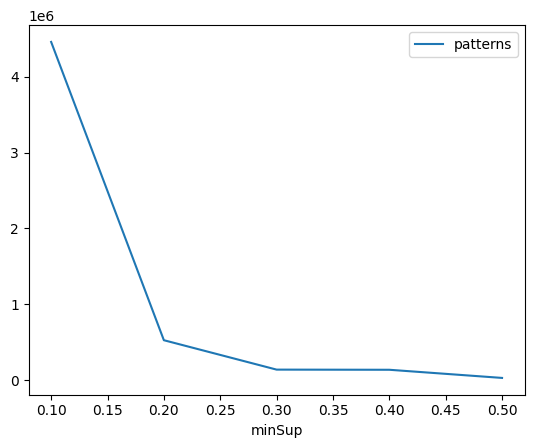

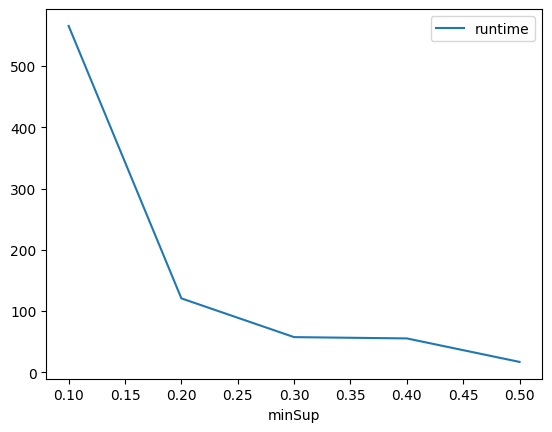

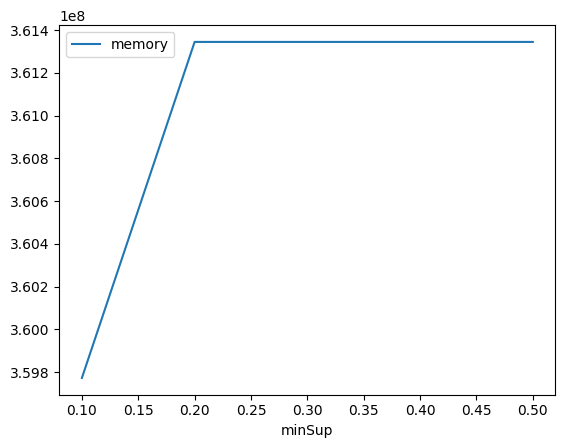

In [18]:
result.plot(x='minSup', y='patterns', kind='line')
result.plot(x='minSup', y='runtime', kind='line')
result.plot(x='minSup', y='memory', kind='line')